# Iris Dataset

In this project, we would try to analyze Iris dataset.
Let's import Pandas framework and read our dataset

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/home/priyesh/Documents/Projects/Data Science Projects/Iris Dataset/iris.csv',
                 header=None, names=['sepal_length','sepal_width','petal_length','petal-width','class'] )
df.head()

,sepal_length,sepal_width,petal_length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df['class'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

In [6]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

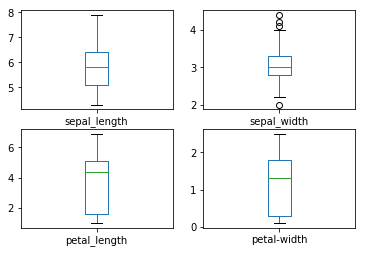

In [7]:
df.plot(kind='box',subplots='True',layout=(2,2), sharex=False, sharey=False)
plt.show()

Let's create a histogram of each input variable to get an idea of their distribution.

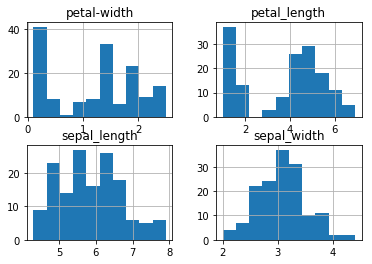

In [8]:
df.hist()
plt.show()

#### Multivariate Plots

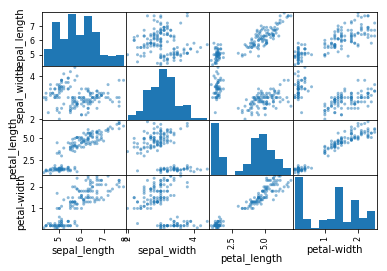

In [9]:
scatter_matrix(df)
plt.show()

There is a diagonal grouping of some pairs of attributes which shows a high correlation and predictable relationship

### Evaluate Some Algorithms

Now it is time to create some models of the data and estimate their accuracy on unseen data.

Here is what we are going to cover in this step:
1. Separate out a validation dataset.
2. Set-up the test harness to use 10-fold cross validation.
3. Build 5 different models to predict species from flower measurements.
4. Select the best model

#### Create a Validation Dataset

We need to know that the model we created is any good.

Later, we will use statistical methods to estimate the accuracy of the models that we create on unseen data. We also want a more concrete estimate of the accuracy of the best model on unseen data by evaluating it on actual unseen data.

That is, we are going to hold back some data that the algorithms will not get to see and we will use this data to get a second and independent idea of how accurate the best model might actually be.

We will split the loaded dataset into two. 80% of which we will use to train our models and 20% that will hold back as a validation dataset.

In [10]:
# Split-out validation dataset
from sklearn import model_selection
array=df.values
X=array[:,0:4]
Y=array[:,4]
validation_size=0.20
seed=7
X_train, X_validation, Y_train, Y_validation=model_selection.train_test_split(X,Y, test_size=validation_size, random_state=seed)

You now have training data in the X_train and Y_train for preparing models and a X_validation and Y_validation sets that we can use later.

#### Test Harness

We will use 10-fold cross validation to estimate accuracy.

This will split our dataset into 10 parts, train on 9 and test on 1 and repeat all combinations of train-test splits.

In [11]:
# Test options and evaluation metric
seed=7
scoring='accuracy'

#### Build Models

We don't know which algorithms would be good on this problem or what configurations to use. We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

Let's evaluate 6 different algorithms: 
* Logistic Regression (LR)
* Linear Discriminant Analysis (LDA)
* K-Nearest Neighbors (KNN)
* Classification and Regression Trees (CART)
* Gaussian Naive Bayes (NB)
* Support Vector Machines (SVM)

This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms. We reset the random number seed before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable.

Let's build and evaluate our models:

In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [13]:
# Spot Check Alogrithms
models=[]
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))
#evaluate each model in turn

results=[]
names=[]
for name, model in models:
    kfold=model_selection.KFold(n_splits=10, random_state=seed)
    cv_results=model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring )
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f) " % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825) 
LDA: 0.975000 (0.038188) 
KNN: 0.983333 (0.033333) 
CART: 0.975000 (0.038188) 
NB: 0.975000 (0.053359) 
SVM: 0.991667 (0.025000) 


In this case, we can see that it looks like Support Vector Machines(SVM) has the largest estimated accuracy score.

We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross validation).

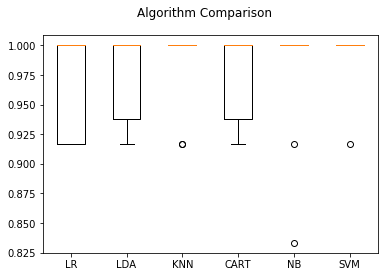

In [14]:
# Compare Algorithms
fig=plt.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We can see that the box and whisker plots are squashed at the top of the range, with many samples achieving 100% accuracy.

## Make Predictions

The KNN algorithm is very simple and was an accurate model based on our tests. Now we want to get an idea of the accuracy of the model on our validation set.

This will give us independent final check on the accuracy of the best model. It is valuable to keep a validation set just in case you made a slip during training, such as overfitting to the training set or a data leak.Both will result in an overly optimistic result.

We can run the KNN model directly on the validation set and summarize the results as a final accuracy score, a confusion matrix and a classification report.

In [15]:
# Make predictions on validation dataset
knn=KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions=knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

      micro avg       0.90      0.90      0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



We can see that the accuracy is 0.9 or 90%. The confusion matrix provides an indication of the three errors made. Finally, the classification report provides a breakdown of each class by precision, recall. f1-score and support showing excellent results.